<a href="https://colab.research.google.com/github/AnishNaphade/Crop-Disease-Detection/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model 1 (epoch=25)

In [ ]:
!pip install keras_preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.6 MB/s eta 0:00:00


In [ ]:
#Import tensorflow and keras library
import tensorflow as tf
import keras_preprocessing
from tensorflow.keras.preprocessing import image
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.layers import BatchNormalization
from keras.optimizers import Adam
import keras
from tensorflow.keras.callbacks import ModelCheckpoint

print("[INFO]: Tensorflow version{}".format(tf.__version__))
state_gpu = tf.test.gpu_device_name()
print("[INFO]: GPU usage{0}".format(state_gpu))

[INFO]: Tensorflow version2.18.0
[INFO]: GPU usage/device:GPU:0


In [ ]:
ROT_RANGE = 10

# this is the augmentation configuration we will use for training
train_gen = ImageDataGenerator(
rescale = 1./255,
rotation_range = ROT_RANGE,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

valid_gen = ImageDataGenerator(rescale = 1./255)

In [ ]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')
zip_path = "/content/drive/MyDrive/DL_SharedData/DL_Dataset/old_dataset.zip"
extract_path = "/content/dataset"

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

TRAINING_DIR = "/content/dataset/tomato/train"
VALIDATION_DIR = "/content/dataset/tomato/val"

Mounted at /content/drive


In [ ]:
TARGET_SIZE = (224,224)
TRAIN_BATCH_SIZE = 128
VALID_BATCH_SIZE = 32
SEED = 42

#Data Iterator
train_data = train_gen.flow_from_directory(
TRAINING_DIR,
target_size = TARGET_SIZE,
class_mode = 'categorical',
color_mode = "rgb",
batch_size = TRAIN_BATCH_SIZE,
shuffle = True,
seed = SEED
)

valid_data = valid_gen.flow_from_directory(
VALIDATION_DIR,
target_size = TARGET_SIZE,
class_mode = 'categorical',
color_mode = "rgb",
batch_size = VALID_BATCH_SIZE
)

Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [ ]:
from keras.applications.vgg16 import VGG16
base_model_weights_path = '/kaggle/input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

x = keras.layers.Flatten() (base_model.output)
x = keras.layers.Dense(256, activation="relu")(x)
x = keras.layers.Dropout(0.25)(x)
output = keras.layers.Dense(10, activation='softmax')(x)
model = keras.models.Model(inputs=base_model.input, outputs=output)

# The newly added layers are initialized with random values.
# Make sure based model remain unchanged until newly added layers weights get reasonable values.
for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,140,042 (80.64 MB)

 Trainable params: 6,425,354 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
for layer in base_model.layers:
    layer.trainable = True

LEARNING_RATE = 0.0001
#LEARNING_RATE = 0.001

#Optimizer
opt = Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
TRAINING_NUM = train_data.samples #or train_data.samples
VALID_NUM = valid_data.samples
EPOCHS = 25

import math

# Use math.ceil() to ensure all samples are used
STEP_SIZE_TRAIN = math.ceil(TRAINING_NUM / TRAIN_BATCH_SIZE)
STEP_SIZE_VALID = math.ceil(VALID_NUM / VALID_BATCH_SIZE)

# Train the model
history = model.fit(train_data,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_data,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=EPOCHS)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 342s 3s/step - accuracy: 0.1528 - loss: 2.2688 - val_accuracy: 0.5360 - val_loss: 1.2398
Epoch 2/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.6095 - loss: 1.0743 - val_accuracy: 0.7430 - val_loss: 0.7127
Epoch 3/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.7939 - loss: 0.5927 - val_accuracy: 0.8770 - val_loss: 0.3375
Epoch 4/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.8918 - loss: 0.3211 - val_accuracy: 0.9070 - val_loss: 0.2971
Epoch 5/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.9254 - loss: 0.2292 - val_accuracy: 0.8650 - val_loss: 0.4533
Epoch 6/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.9326 - loss: 0.2059 - val_accuracy: 0.9140 - val_loss: 0.2413
Epoch 7/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 206s 2s/step - accuracy: 0.9361 - loss: 0.1945 - val_accuracy: 0.9500 - val_loss: 0.1499
Epoch 8/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.9685 - loss: 0.0940 - val_accuracy: 0.9180 - v

In [ ]:
# Scores is just a list containing loss and accuracy value
scores=model.evaluate(train_data)
scores2=model.evaluate(valid_data)
print("Training Loss is :"+str(scores[0]))
print("Training Accuracy is :" +str(scores[1] * 100))
print("Validation Loss is :"+str(scores2[0]))
print("Validation Accuracy is :"+str(scores2[1]*100)+" %")

79/79 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - accuracy: 0.9932 - loss: 0.0228
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 0.9785 - loss: 0.0540
Training Loss is :0.02396266721189022
Training Accuracy is :99.25000071525574
Validation Loss is :0.051480986177921295
Validation Accuracy is :98.00000190734863 %


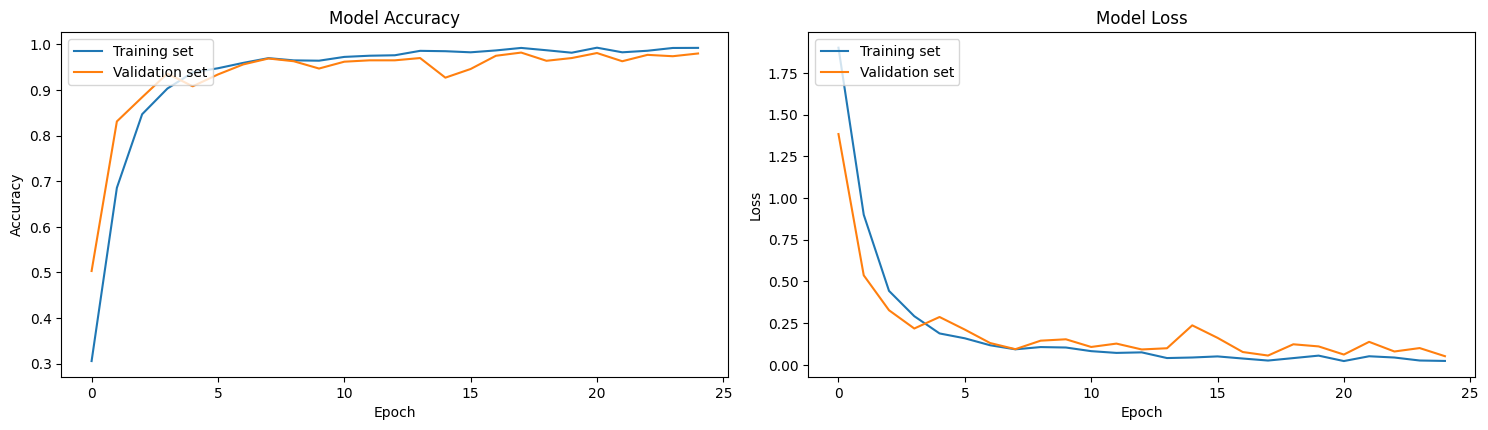

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

# Accuracy
plt.subplot(221)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')

# Loss
plt.subplot(222)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
best_val_acc = max(history.history['val_accuracy'])
print("[INFO] Best Validation Accuracy: %",best_val_acc*100)

[INFO] Best Validation Accuracy: % 98.4000027179718


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/VGG16.h5')

In [ ]:
from google.colab import files
files.download("VGG16.h5")

FileNotFoundError: Cannot find file: VGG16.h5

# Model 2 (epoch=50)

In [ ]:
train_datagen=ImageDataGenerator(validation_split=0.2,rescale=1./255,
                                 horizontal_flip=True,rotation_range=.2,shear_range=.2)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
training_set=train_datagen.flow_from_directory(TRAINING_DIR,
                                               target_size=(224,224),class_mode="categorical",batch_size=32,shuffle=True,subset="training")

validation_generator = train_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=True,
        subset="validation")

test_set=test_datagen.flow_from_directory(VALIDATION_DIR,
                                          target_size=(224,224),batch_size=32,class_mode="categorical",shuffle=True)

Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [ ]:
from tensorflow import keras
from keras.applications.vgg16 import VGG16
base_model = keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=[224, 224, 3])
#load weight from local file which is just added
#base_model = applications.VGG16(weights='../input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=(img_rows, img_cols, img_channel))

base_model_weights_path = '/kaggle/input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
# base_model = VGG16(weights=base_model_weights_path, include_top=False, input_shape=(224, 224, 3))

x = keras.layers.Flatten() (base_model.output)
x = keras.layers.Dense(256, activation="relu")(x)
x = keras.layers.Dropout(0.25)(x)
output = keras.layers.Dense(units=len(training_set.class_indices), activation='softmax')(x)
model = keras.models.Model(inputs=base_model.input, outputs=output)

# The newly added layers are initialized with random values.
# Make sure based model remain unchanged until newly added layers weights get reasonable values.
for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,140,042 (80.64 MB)

 Trainable params: 6,425,354 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
for layer in base_model.layers:
    layer.trainable = True
from keras.optimizers import SGD

# Set your learning rate and momentum
LEARNING_RATE = 0.0001
MOMENTUM = 0.9

# Define the SGD optimizer
opt = SGD(learning_rate=LEARNING_RATE, momentum=MOMENTUM)

# Compile the model
model.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
EPOCHS = 50  # or any number of your choice
history = model.fit(
    x=training_set,
    validation_data=validation_generator,
    epochs=EPOCHS
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 215s 718ms/step - accuracy: 0.3537 - loss: 1.8043 - val_accuracy: 0.8295 - val_loss: 0.5526
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 174s 694ms/step - accuracy: 0.7933 - loss: 0.6140 - val_accuracy: 0.8995 - val_loss: 0.3198
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 176s 702ms/step - accuracy: 0.8826 - loss: 0.3608 - val_accuracy: 0.9295 - val_loss: 0.2193
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 161s 641ms/step - accuracy: 0.9157 - loss: 0.2554 - val_accuracy: 0.9005 - val_loss: 0.3043
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 158s 630ms/step - accuracy: 0.9307 - loss: 0.2164 - val_accuracy: 0.9150 - val_loss: 0.2749
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 158s 631ms/step - accuracy: 0.9407 - loss: 0.1756 - val_accuracy: 0.9525 - val_loss: 0.1501
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 160s 638ms/step - accuracy: 0.9617 - loss: 0.1132 - val_accuracy: 0.8755 - val_loss: 0.3572
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 158s 631ms/step - accuracy: 0.9608 -

In [ ]:
# Scores is just a list containing loss and accuracy value
scores=model.evaluate(training_set)
scores2=model.evaluate(test_set)
print("Training Loss is : "+str(scores[0]))
print("Training Accuracy is : "+str(scores[1]*100)+" %")
print("Testing Loss is : "+str(scores2[0]))
print("Testing Accuracy is : "+str(scores2[1]*100)+" %")

250/250 ━━━━━━━━━━━━━━━━━━━━ 101s 402ms/step - accuracy: 1.0000 - loss: 5.6192e-04
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 322ms/step - accuracy: 0.9612 - loss: 0.1389
Training Loss is : 0.0005703522474505007
Training Accuracy is : 100.0 %
Testing Loss is : 0.16040636599063873
Testing Accuracy is : 96.20000123977661 %


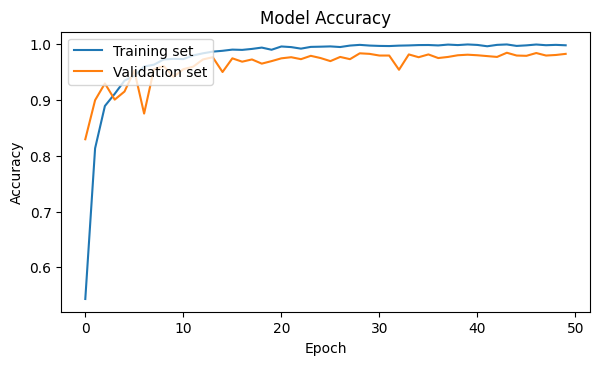

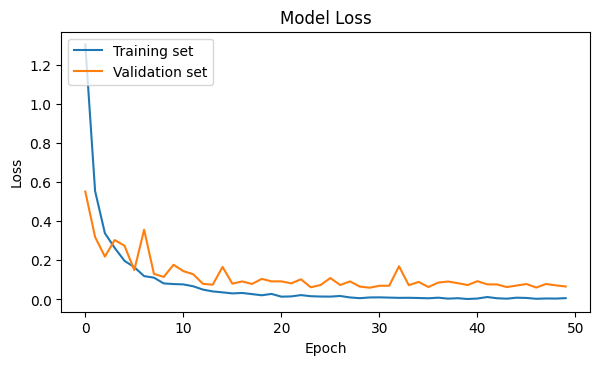

In [ ]:
import matplotlib.pyplot as plt

plt.figure( figsize = (15,8))

plt.subplot(221)
# Accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()


# Loss
plt.figure( figsize = (15,8))
plt.subplot(222)
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()